# Solutions: Visualizing Data

## Read in the data

In [1]:
import pandas as pd

songs = pd.read_csv('../Data/spotify_songs.csv')
songs.head()

,name,artists,energy,key,mode,valence,tempo,duration_ms
0,God's Plan,Drake,0.449,7,1,0.357,77.169,198973
1,SAD!,XXXTENTACION,0.613,8,1,0.473,75.023,166606
2,rockstar (feat. 21 Savage),Post Malone,0.535,5,0,0.140,159.847,218147
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.559,8,1,0.439,140.124,221440
4,In My Feelings,Drake,0.626,1,1,0.350,91.030,217925


In [2]:
songs.shape

(100, 8)

## Distributions

Hi,

Our music analysis team has labeled 100 songs with their musical attributes, such as its danceability and energy. Can you tell us more about the distributions of the musical attributes? I’m guessing that since most of the musical attributes are numeric, they should be normally distributed, but let me know if you see otherwise.

Thanks!\
Sarah

### Interpret the histograms

[Musical attribute definitions](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

* Fields with normal distributions: valence
* Fields with other distributions: key and mode
* Skewed fields: energy
* Outliers: duration_ms
* Other observations: tempos of 90-100 are really popular
* Do your interpretations make sense?

In [3]:
# Import the seaborn library
import seaborn as sns

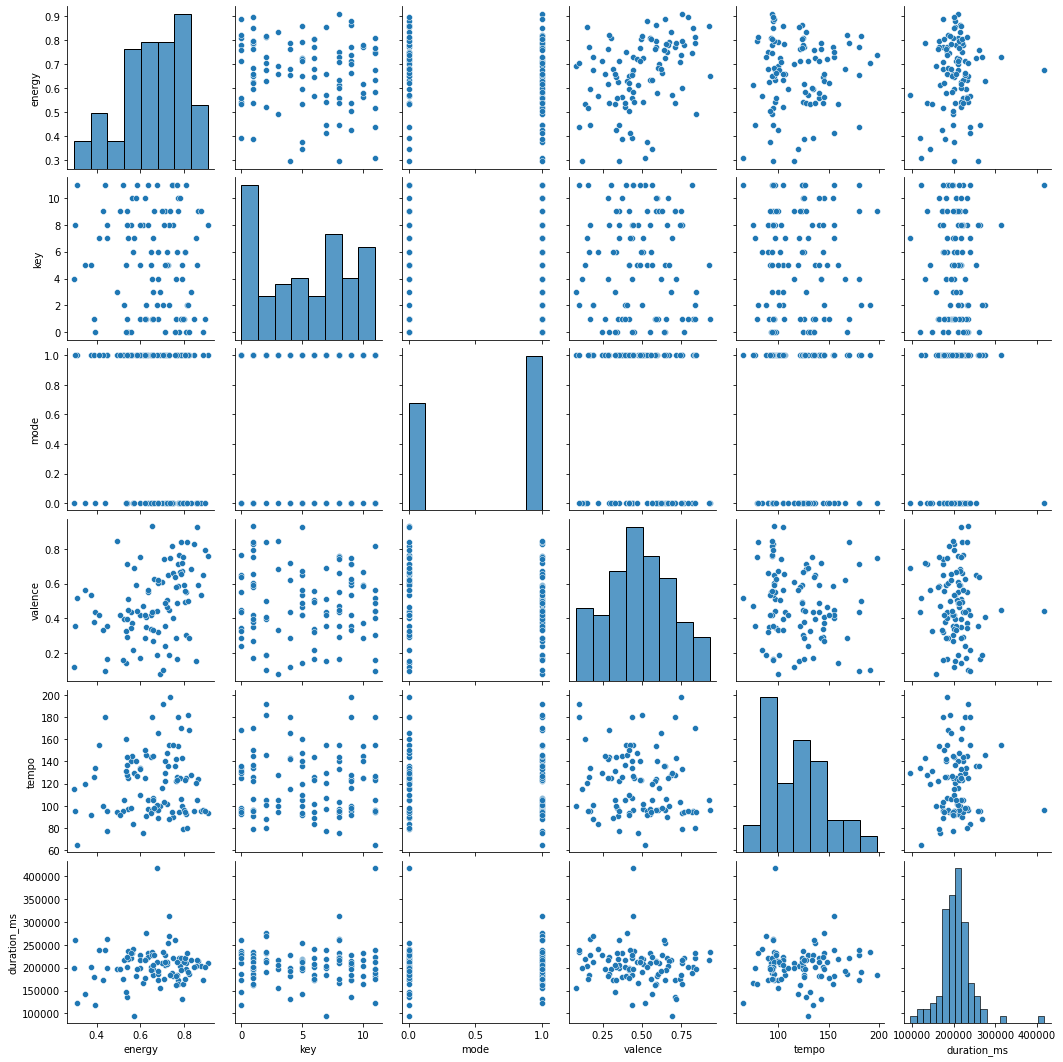

In [4]:
# Create a pair plot
sns.pairplot(songs);

In [5]:
# duration outliers
songs[songs.duration_ms > 300000]

,name,artists,energy,key,mode,valence,tempo,duration_ms
21,Te Bot? - Remix,Nio Garcia,0.675,11,0,0.442,96.507,417920
42,SICKO MODE,Travis Scott,0.730,8,1,0.446,155.008,312820


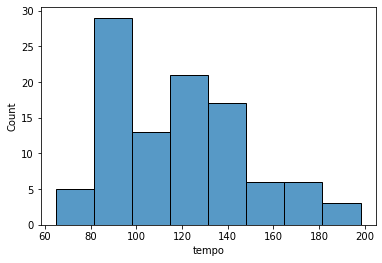

In [6]:
# tempo histogram
sns.histplot(songs.tempo);

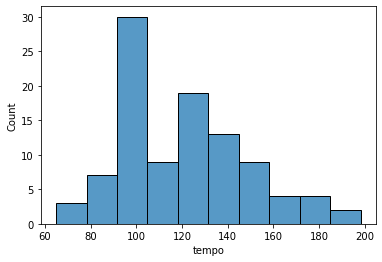

In [7]:
# tempo histogram with more bins
sns.histplot(songs.tempo, bins=10);

In [8]:
# look at the tempo of most songs
songs.tempo.round(-1).value_counts().sort_index()

60.0      1
80.0      5
90.0     16
100.0    19
110.0     6
120.0    12
130.0    12
140.0    10
150.0     7
160.0     3
170.0     3
180.0     4
190.0     1
200.0     1
Name: tempo, dtype: int64

## Correlations

Hi again,

Thanks for looking into those distributions earlier. Can you also tell us more about the correlations of the musical attributes?
Can you tell us about any relationships you can find in the data between the attributes, like if some are positively or negatively correlated?

Thanks!\
Sarah

### Interpret the scatter plots

[Musical attribute definitions](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

* Highly correlated: none
* Uncorrelated: key vs valence / tempo / duration_ms
* Positive correlation: energy vs valence (positivity)
* Negative correlation: mode vs valence (positivity)
* Other observations: key and mode are discrete, duration_ms has an outlier
* Do your interpretations make sense?

In [13]:
songs.corr()

,energy,key,mode,valence,tempo,duration_ms
energy,1.000000,-0.136345,-0.117555,0.382434,0.062272,0.073017
key,-0.136345,1.000000,-0.141568,-0.032622,0.003737,0.046144
mode,-0.117555,-0.141568,1.000000,-0.210599,-0.011911,0.055411
valence,0.382434,-0.032622,-0.210599,1.000000,-0.148423,-0.131901
tempo,0.062272,0.003737,-0.011911,-0.148423,1.000000,0.005493
duration_ms,0.073017,0.046144,0.055411,-0.131901,0.005493,1.000000


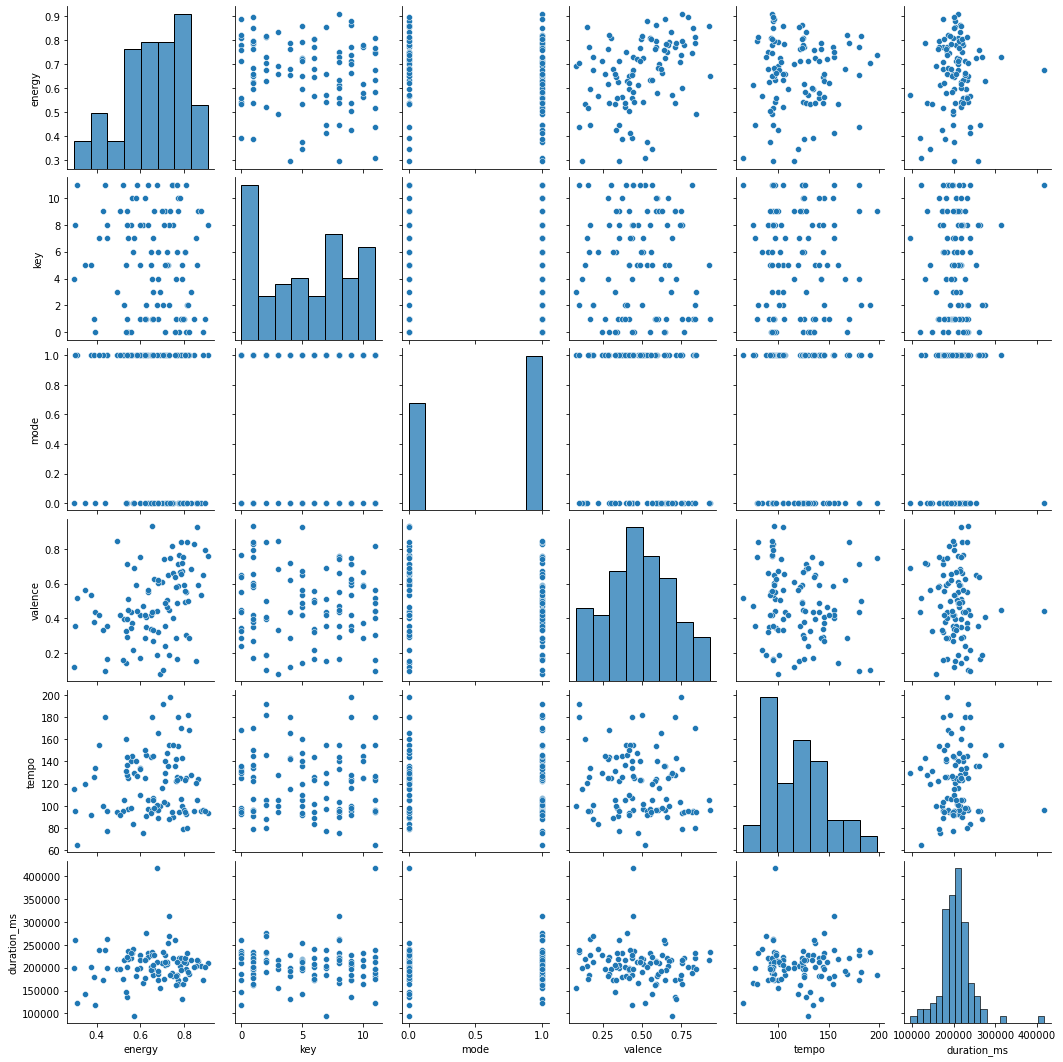

In [14]:
sns.pairplot(songs);

In [16]:
songs.sort_values(by='valence', ascending=False)

,name,artists,energy,key,mode,valence,tempo,duration_ms
25,Shape of You,Ed Sheeran,0.652,1,0,0.9310,95.977,233713
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.859,5,0,0.9260,105.115,217289
89,Bella,Wolfine,0.493,3,1,0.8440,94.016,197120
66,D?jala que vuelva (feat. Manuel Turizo),Piso 21,0.788,1,1,0.8390,170.019,220117
78,Criminal,Natti Natasha,0.813,2,0,0.8390,79.997,232550
...,...,...,...,...,...,...,...,...
2,rockstar (feat. 21 Savage),Post Malone,0.535,5,0,0.1400,159.847,218147
80,lovely (with Khalid),Billie Eilish,0.296,4,0,0.1200,115.284,200186
93,This Is Me,Keala Settle,0.704,2,1,0.1000,191.702,234707
98,Dusk Till Dawn - Radio Edit,ZAYN,0.437,11,0,0.0967,180.043,239000
